In [ ]:
# What did I do to learn about neural networks?
# I watched and took notes on the basics of neural networks.
# I then looked a cat vs dog convolution neural network to get a better understanding of tensorflow / the os system.
# I then made my own CNN which you can see below. 

In [1]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [2]:
# Import too many modules.
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [3]:
# I first found a unique zip folder on akggle
# I chose to make a neural network that would predict the animal from one of 4 classes. 
# The 4 classes were the following: cheetah, hyena, jaguar, and tiger.


os.chdir('C:/Users/spart/cheetah-vs-hyena-vs-jaguar-vs-tiger')
if os.path.isdir('train/cheetah') is False:
    os.makedirs('train/cheetah')
    os.makedirs('train/hyena')
    os.makedirs('valid/cheetah')
    os.makedirs('valid/hyena')
    os.makedirs('test/cheetah')
    
    os.makedirs('test/hyena')
    os.makedirs('train/jaguar')
    os.makedirs('train/tiger')
    os.makedirs('valid/jaguar')
    os.makedirs('valid/tiger')
    os.makedirs('test/jaguar')
    os.makedirs('test/tiger')
    
    for i in random.sample(glob.glob('cheetah*'), 500):
        shutil.move(i, 'train/cheetah')      
    for i in random.sample(glob.glob('hyena*'), 500):
        shutil.move(i, 'train/hyena')
    for i in random.sample(glob.glob('cheetah*'), 100):
        shutil.move(i, 'valid/cheetah')        
    for i in random.sample(glob.glob('hyena*'), 100):
        shutil.move(i, 'valid/hyena')
    for i in random.sample(glob.glob('cheetah*'), 50):
        shutil.move(i, 'test/cheetah')      
    for i in random.sample(glob.glob('hyena*'), 50):
        shutil.move(i, 'test/hyena')   
   
    for i in random.sample(glob.glob('jaguar*'), 500):
        shutil.move(i, 'train/jaguar')      
    for i in random.sample(glob.glob('tiger*'), 500):
        shutil.move(i, 'train/tiger')
    for i in random.sample(glob.glob('jaguar*'), 100):
        shutil.move(i, 'valid/jaguar')        
    for i in random.sample(glob.glob('tiger*'), 100):
        shutil.move(i, 'valid/tiger')
    for i in random.sample(glob.glob('jaguar*'), 50):
        shutil.move(i, 'test/jaguar')      
    for i in random.sample(glob.glob('tiger*'), 50):
        shutil.move(i, 'test/tiger')

os.chdir('../../')

# This part and the next two were easily the most annoying part of the project.

In [4]:
train_path = 'C:/Users/spart/cheetah-vs-hyena-vs-jaguar-vs-tiger/train'
valid_path = 'C:/Users/spart/cheetah-vs-hyena-vs-jaguar-vs-tiger/valid'
test_path = 'C:/Users/spart/cheetah-vs-hyena-vs-jaguar-vs-tiger/test'
# This just made sub folders in my train folder for training, validation, and testing.

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cheetah', 'hyena', 'jaguar', 'tiger'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cheetah', 'hyena', 'jaguar', 'tiger'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cheetah', 'hyena', 'jaguar', 'tiger'], batch_size=10, shuffle=False)

# This puts the data in a into a format that the model expects.
# The model recieves the data with a fit function.
# These images will go into the format of a keras generator. 
# These images are preprocessed in a vgg16 format.

Found 2000 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [6]:
imgs, labels = next(train_batches)

In [7]:
# This was a simple copy/paste to show some random pictures and their labels.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

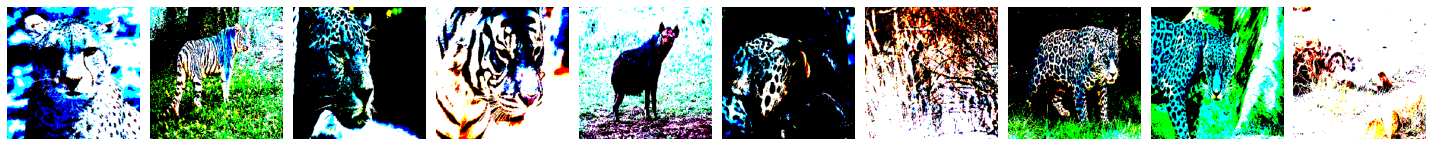

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [8]:
plotImages(imgs)
print(labels)

In [9]:
# This is the actual convolution neural network.
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=4, activation='softmax')
])
# In a convolutional neural network, filters or "kernels" capture relevant spatial features in a picture. 
# The convolution layers are used to find patterns or "features." 
# Pooling layers are mainly used to reduce the amount of computations. 
# The pooling layer throws out unecessary information like patterns that are not present.
# Dense is the output. We can see "units=4" which represents the 4 possible classes. 

In [10]:
model.summary()
# "Parameters" are pretty much the weights of a neural network. 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 4)                 802820    
Total params: 822,212
Trainable params: 822,212
Non-trainable params: 0
__________________________________________________

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
200/200 - 8s - loss: 19.9403 - accuracy: 0.4655 - val_loss: 5.0888 - val_accuracy: 0.5775
Epoch 2/10
200/200 - 8s - loss: 1.2052 - accuracy: 0.7955 - val_loss: 3.0434 - val_accuracy: 0.5900
Epoch 3/10
200/200 - 8s - loss: 0.2167 - accuracy: 0.9370 - val_loss: 2.3556 - val_accuracy: 0.6075
Epoch 4/10
200/200 - 8s - loss: 0.0531 - accuracy: 0.9820 - val_loss: 2.4729 - val_accuracy: 0.6250
Epoch 5/10
200/200 - 8s - loss: 0.0117 - accuracy: 0.9960 - val_loss: 2.4736 - val_accuracy: 0.6125
Epoch 6/10
200/200 - 8s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.2503 - val_accuracy: 0.6400
Epoch 7/10
200/200 - 8s - loss: 5.8790e-04 - accuracy: 1.0000 - val_loss: 2.2580 - val_accuracy: 0.6425
Epoch 8/10
200/200 - 8s - loss: 4.5885e-04 - accuracy: 1.0000 - val_loss: 2.2528 - val_accuracy: 0.6450
Epoch 9/10
200/200 - 8s - loss: 3.8005e-04 - accuracy: 1.0000 - val_loss: 2.2576 - val_accuracy: 0.6500
Epoch 10/10
200/200 - 8s - loss: 3.2541e-04 - accuracy: 1.0000 - val_loss: 2.2562 - val

In [13]:
# Now, we will actually use prediction

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

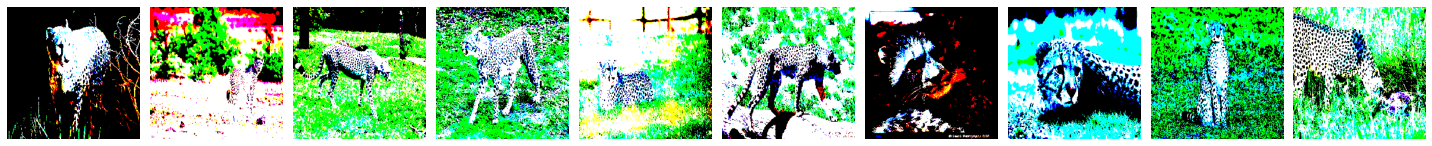

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [14]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [15]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [16]:
predictions = model.predict(x=test_batches, verbose=0)

In [17]:
np.round(predictions)
# This is sooooo ugly. Let's actually graph the information.

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],


In [18]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [19]:
# This came right from Scikit learn. This basically graphs the prediction data into a confusion matrix.

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


Confusion matrix, without normalization
[[28  9  4  9]
 [ 6 39  0  5]
 [10  1 31  8]
 [ 4 11  8 27]]


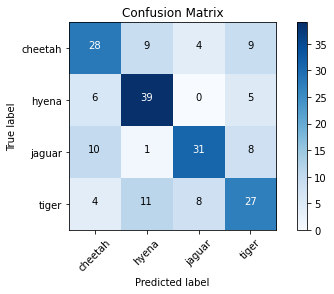

In [20]:
cm_plot_labels = ['cheetah','hyena', 'jaguar', 'tiger']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
# Why is the prediction rate meh? It is due to the low value accuracy.
# A low value accuracy means that the model is too specific and the model is overfitting.
# How do you get a higher value accuracy? There are two ways.
# 1. Train the model with much more data. Thousands of images to train a model sounds like a lot but it is not in machine learning.
# 2. We can use a pre trained model. "Models that are pre-trained on ImageNet are good at detecting high-level features like edges, patterns, etc." 